<a href="https://colab.research.google.com/github/Azeezmariam/Language_Dectection_Model/blob/main/Language_Dectection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score


In [14]:
pip install tensorflow pandas scikit-learn

In [15]:
# Load the dataset to preview its structure
file_path = '/content/EACLanguageDetectionDataSet.csv'
df = pd.read_csv(file_path)

# Show basic info and first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      3999 non-null   object
 1   Language  3999 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


(None,
                                                 Text Language
 0   Nature, in the broadest sense, is the natural...  English
 1  "Nature" can refer to the phenomena of the phy...  English
 2  The study of nature is a large, if not the onl...  English
 3  Although humans are part of nature, human acti...  English
 4  [1] The word nature is borrowed from the Old F...  English)

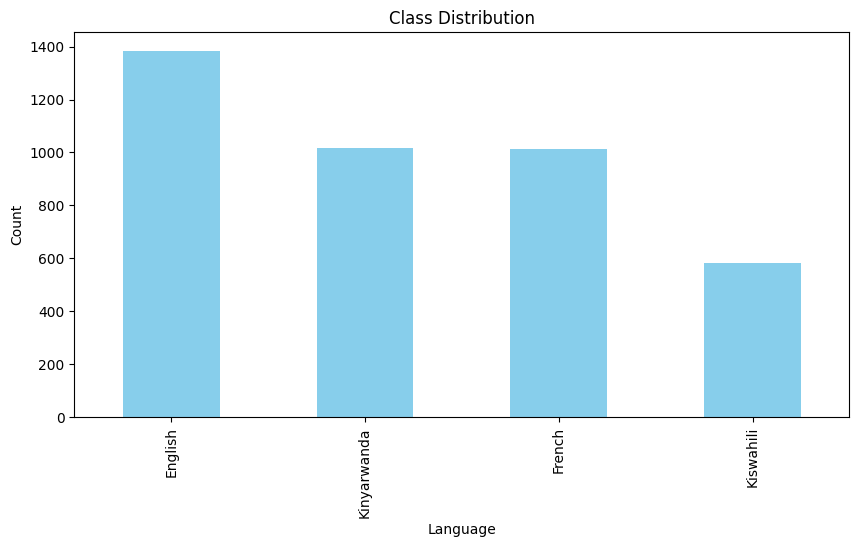

((3199, 5000), (400, 5000), (400, 5000))

In [16]:
#Data Preprocessing
# Step 1: Lowercasing
df['Text'] = df['Text'].str.lower()

# Step 2: Remove punctuation
df['Text'] = df['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Check class balance
class_distribution = df['Language'].value_counts()

# Step 3: Tokenization and Step 4: Stopword removal will be handled by TfidfVectorizer

# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Text'])

# Extracting target variable
y = df['Language']

# Split the dataset into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Plot the class distribution
plt.figure(figsize=(10,5))
class_distribution.plot(kind='bar', title='Class Distribution', color='skyblue')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

X_train.shape, X_val.shape, X_test.shape


In [17]:
# Encode the target labels (Language) to numeric values
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train))
y_val_enc = to_categorical(label_encoder.transform(y_val))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# Get the number of unique classes (languages)
num_classes = y_train_enc.shape[1]
print("Number of unique classes:", num_classes)

Number of unique classes: 4


Explanation: The text has been lowercased and punctuation removed. TF-IDF vectorization was applied, converting the text into numerical form with 5,000 features. The dataset has been split into training 3,199 samples, validation 400 samples, and test sets 400 samples. The class distribution of languages in the dataset was also plotted above.

In [18]:
#VANNILA MODEL
#Build the simple neural network model
model_1 = Sequential()
model_1.add(Dense(128, input_dim=5000, activation='relu'))  # Input layer and one hidden layer
model_1.add(Dense(num_classes, activation='softmax'))  # Output layer for multiclass classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#Compile the model
model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model on training data
history_1 = model_1.fit(X_train.toarray(), y_train_enc, validation_data=(X_val.toarray(), y_val_enc),
                        epochs=10, batch_size=32, verbose=1)

#Evaluate the model on the test set
test_loss_1, test_acc_1 = model_1.evaluate(X_test.toarray(), y_test_enc, verbose=0)

#Print the test accuracy and loss
print(f"Test Accuracy: {test_acc_1}")
print(f"Test Loss: {test_loss_1}")

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6741 - loss: 1.2149 - val_accuracy: 0.9075 - val_loss: 0.6595
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9534 - loss: 0.4854 - val_accuracy: 0.9500 - val_loss: 0.2748
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9789 - loss: 0.1598 - val_accuracy: 0.9625 - val_loss: 0.1589
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9850 - loss: 0.0775 - val_accuracy: 0.9700 - val_loss: 0.1191
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9867 - loss: 0.0579 - val_accuracy: 0.9775 - val_loss: 0.0948
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9942 - loss: 0.0331 - val_accuracy: 0.9775 - val_loss: 0.0853
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9909 - loss: 0.0350 - val_accuracy: 0.9800 - val_loss: 0.0772
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9947 - loss: 0.0262 - val_accuracy: 

In [20]:
#Save the model in the new Keras format
model_1.save('language_detection_model.keras')

EXPLANATION
The code defines a simple neural network using Keras for multiclass classification. It consists of an input layer with 128 neurons and a ReLU activation, followed by an output layer using softmax. The model is compiled with categorical crossentropy loss and accuracy as the evaluation metric. It is trained for 10 epochs on the training data and validated using a separate dataset. Finally, the model is saved in Keras format and evaluated on the test set.

In [27]:
#A model applying at least 3 optimization techniques
#Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9  # Reduce learning rate by 10% after each epoch

#Build the optimized neural network model
num_classes = len(label_encoder.classes_)  # Number of output classes
model_2 = Sequential()
model_2.add(Dense(128, input_dim=5000, activation='relu', kernel_regularizer=l2(0.001)))  # L2 Regularization
model_2.add(BatchNormalization())  # Batch normalization
model_2.add(Dropout(0.5))  # Dropout to prevent overfitting
model_2.add(Dense(num_classes, activation='softmax'))  # Output layer

#Compile the model with a different optimizer
adam_optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model with a learning rate scheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)
history_2 = model_2.fit(X_train.toarray(), y_train_enc, validation_data=(X_val.toarray(), y_val_enc),
                        epochs=10, batch_size=32, callbacks=[lr_callback], verbose=1)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7100 - loss: 0.8436 - val_accuracy: 0.8750 - val_loss: 1.1352 - learning_rate: 0.0010
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9851 - loss: 0.1142 - val_accuracy: 0.9525 - val_loss: 0.8919 - learning_rate: 0.0010
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9931 - loss: 0.0769 - val_accuracy: 0.9675 - val_loss: 0.6189 - learning_rate: 0.0010
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9960 - loss: 0.0616 - val_accuracy: 0.9750 - val_loss: 0.3566 - learning_rate: 0.0010
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9959 - loss: 0.0604 - val_accuracy: 0.9825 - val_loss: 0.1971 - learning_rate: 0.0010
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9951 - loss: 0.0574 - val_accuracy: 0.9850 - val_loss: 0.1222 - learning_rate: 9.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9930 - loss

In [28]:
#Evaluate the model on the test set
test_loss_2, test_acc_2 = model_2.evaluate(X_test.toarray(), y_test_enc, verbose=0)

#Print the test accuracy and loss
print(f"Test Accuracy: {test_acc_2:.4f}")
print(f"Test Loss: {test_loss_2:.4f}")


Test Accuracy: 0.9825
Test Loss: 0.0856


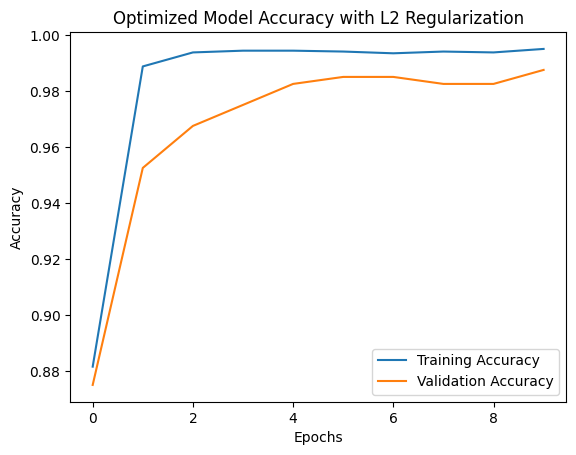

In [29]:
#Plot training and validation accuracy
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Optimized Model Accuracy with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
#Save the model in Keras format
model_2.save('optimized_language_detection_model.keras')


EXPLANATION
This code defines an optimized neural network model that applies three key optimization techniques: L2 regularization, batch normalization, and dropout to prevent overfitting. The model is trained with the Adam optimizer and a custom learning rate scheduler, which reduces the learning rate by 10% after the 5th epoch to improve performance. The training process is tracked using validation data, and accuracy is plotted across epochs. After training, the model is evaluated on a test set, and both accuracy and loss are displayed to assess its effectiveness.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


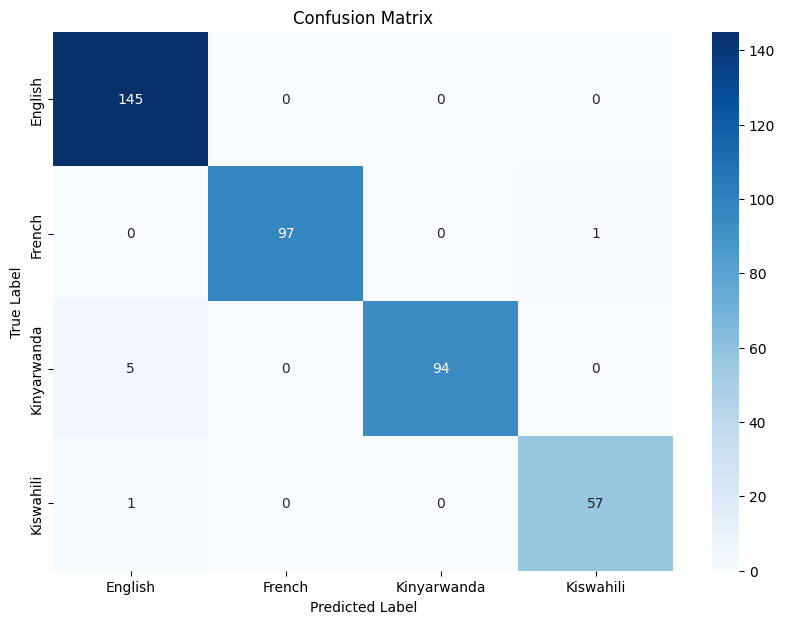

In [31]:
#ERROR ANALYSIS
#Predict on the test set
y_pred = model_2.predict(X_test.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

#Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [34]:
#Classification Report (includes Precision, Recall, and F1-Score)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

#F1 Score (macro average)
f1 = f1_score(y_true, y_pred_classes, average='macro')
print(f"F1 Score (Macro Average): {f1:.4f}")

#Specificity calculation for each class
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    true_negatives = cm.sum(axis=1) - np.diag(cm)
    false_positives = cm.sum(axis=0) - np.diag(cm)
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

specificity = specificity_score(y_true, y_pred_classes)
for idx, label in enumerate(label_encoder.classes_):
    print(f"Specificity for {label}: {specificity[idx]:.4f}")


Classification Report:
              precision    recall  f1-score   support

     English       0.96      1.00      0.98       145
      French       1.00      0.99      0.99        98
 Kinyarwanda       1.00      0.95      0.97        99
   Kiswahili       0.98      0.98      0.98        58

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

F1 Score (Macro Average): 0.9829
Specificity for English: 0.0000
Specificity for French: 1.0000
Specificity for Kinyarwanda: 1.0000
Specificity for Kiswahili: 0.5000
